In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from seaborn import pairplot 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
import statsmodels.api as sm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from IPython.display import Image
# import pydotplus
# import graphviz
from os import system
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score, precision_score,classification_report,roc_auc_score,precision_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
df = pd.read_csv("bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [45]:
df.shape

(45211, 17)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [47]:
df.isnull().sum().sum()

0

Hence there are no null values with 10 objects and 7 integer data types

As per given data we know that 10 features are of category type,so lets convert the datatype of those features

In [48]:
cat_columns = df.loc[:, df.dtypes == object].columns
cont_columns = df.loc[:, df.dtypes != object].columns
df[cat_columns].apply(pd.Categorical)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


After conversion of datatypes in above step
10 features have category datatype and 7 have int datatype

In [49]:
df[cat_columns]

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


Checking columns which contain string data

In [50]:
print(df['poutcome'].unique())
print(df['contact'].unique())
print(df['education'].unique())
print(df['job'].unique())

['unknown' 'failure' 'other' 'success']
['unknown' 'cellular' 'telephone']
['tertiary' 'secondary' 'unknown' 'primary']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [51]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


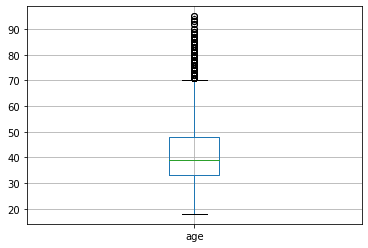

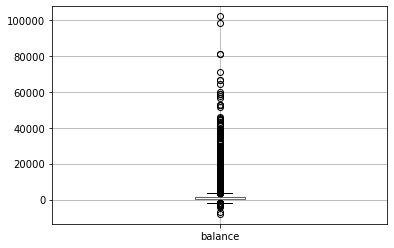

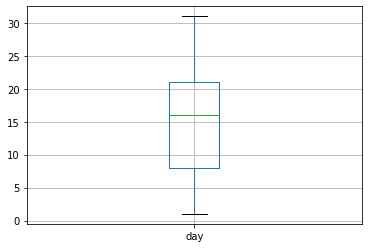

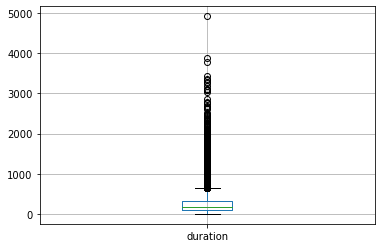

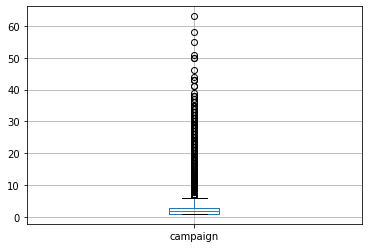

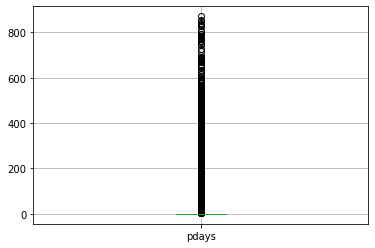

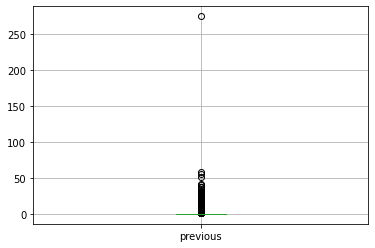

In [52]:
for column in cont_columns:      
    df.boxplot([column])
    plt.show()

# 5 point summary understanding:

-->Outliers are present in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.

-->'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.

-->More than 75% people have been contacted in a day after previous campaign as pdays is -1 till 75th precentile.

-->Minimum balance is -8019 and maximum balance is 102127

-->Minimum age is 18 years and maximum is 95 years

# Distribution of numerical columns.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
<ipython-input-53-55cdf157f416>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() #display plots


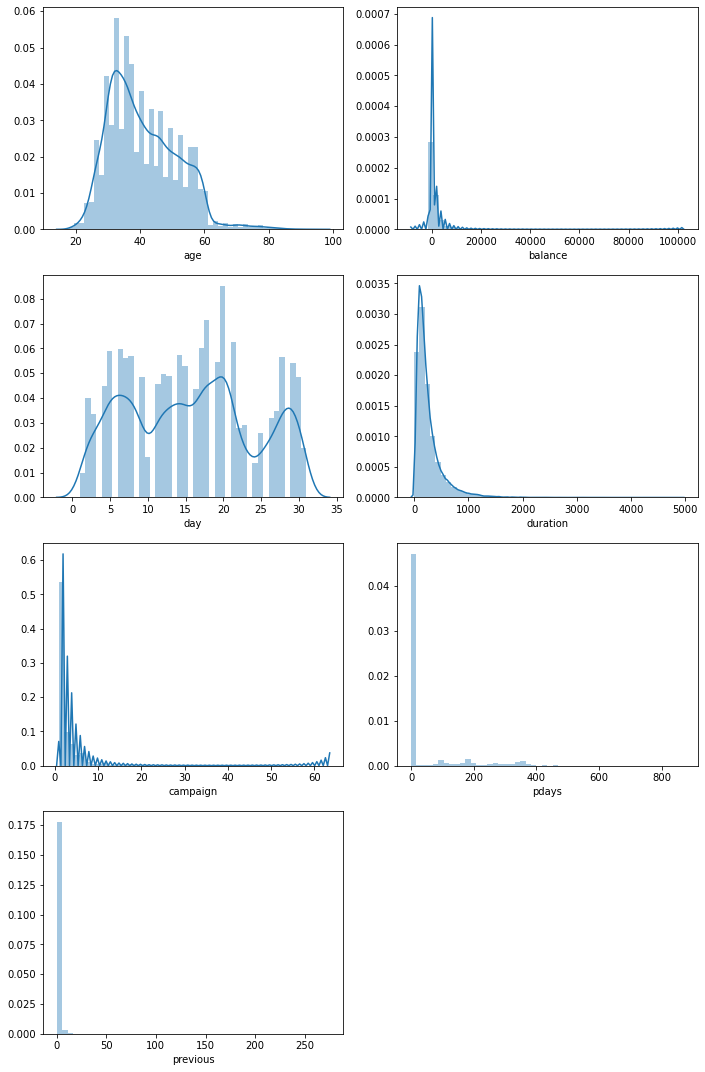

In [53]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() #to flatten subplot index positions
sns.distplot(df['age'],ax=axe[0]) #Distance plot of 'age'
sns.distplot(df['balance'],ax=axe[1]) #Distance plot of 'balance'
sns.distplot(df['day'],ax=axe[2]) #Distance plot of 'day'
sns.distplot(df['duration'],ax=axe[3]) #Distance plot of 'duration'
sns.distplot(df['campaign'],ax=axe[4]) #Distance plot of 'campaign'
sns.distplot(df['pdays'],ax=axe[5]) #Distance plot of 'pdays'
sns.distplot(df['previous'],ax=axe[6]) #Distance plot of 'previous'
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)

### Understanding from distributions
* 'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
* 'age' is somewhat normally distributed

# Distribution of Categorical columns.

<ipython-input-54-0def2c7afe6e>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() #display plots


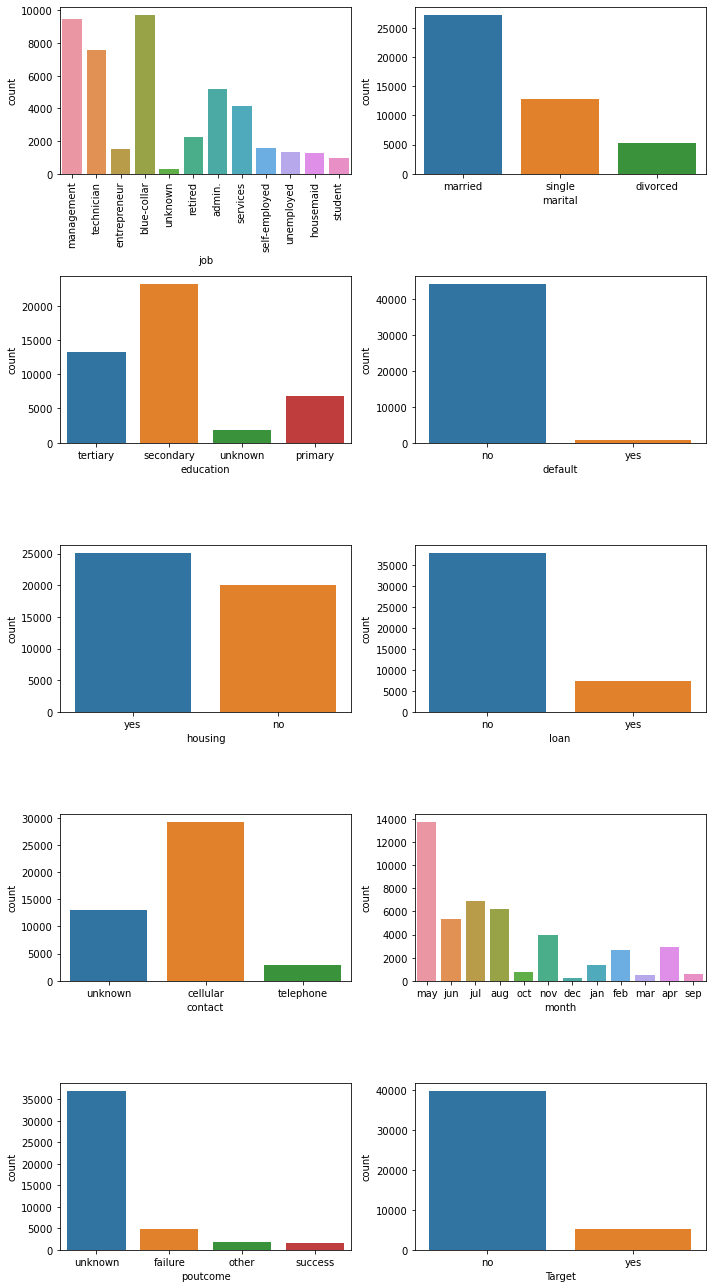

In [54]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() #to flatten subplot index positions
i = 0
for column in cat_columns:
    plot=sns.countplot(x=df[column],data=df,ax=axe[i])
    if i==0:
        plt.setp(plot.get_xticklabels(), rotation=90)
    i+=1
fig.tight_layout() #for arranging the plots
fig.show() #display plots

 ### Understanding from distributions
* More than 90% customers have no default credit
* Around 88% customers have not subscribed for term deposit
* Most customers have been contacted in may
* Most customers have been contacted by cellular network(mobile phone)
* Number of customers who have housing loan is more than the number of customers who don't have housing loan
* Around 6% customers have credit in default

In [55]:
df.skew().to_frame("Skew").T

,age,balance,day,duration,campaign,pdays,previous
Skew,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


## Checking the presence of outliers 

<ipython-input-56-1ba976cb9d27>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() #display plots


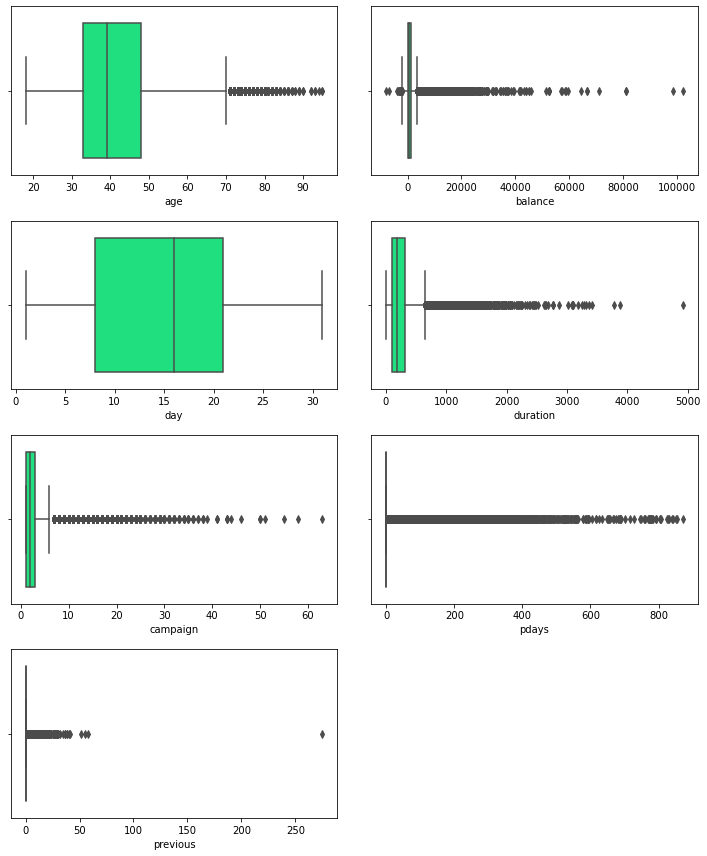

In [56]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sns.boxplot(x='age',data=df,color='springgreen',ax=axe[0]) #Box plot of 'ID' for finding outliers 
sns.boxplot(x='balance',data=df,color='springgreen',ax=axe[1]) #Box plot of 'Family' 
sns.boxplot(x='day',data=df,color='springgreen',ax=axe[2]) #Box plot of 'Personal Loan' 
sns.boxplot(x='duration',data=df,color='springgreen',ax=axe[3]) #Box plot of 'CD Account' 
sns.boxplot(x='campaign',data=df,color='springgreen',ax=axe[4]) #Box plot of 'Online' 
sns.boxplot(x='pdays',data=df,color='springgreen',ax=axe[5]) #Box plot of 'CreditCard'
sns.boxplot(x='previous',data=df,color='springgreen',ax=axe[6]) #Box plot of 'CreditCard' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)

### Understanding from boxplots
* Prove the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
* Values less than 0 are present in 'Balance' column

In [57]:
df['Target'].value_counts().to_frame("Target")

,Target
no,39922
yes,5289


* From above values it can be stated that the dataset is imbalanced.
* Hence we will be upscaling the minority.

In [58]:
from sklearn.utils import resample
df_minority = df[df["Target"] == "yes"]
df_majority = df[df["Target"] == "no"]

df_min_upsampled = resample(df_minority, replace=True, n_samples=39922, random_state=123)

df = pd.concat([df_majority, df_min_upsampled])
df["Target"].value_counts()

no     39922
yes    39922
Name: Target, dtype: int64

# Data Preprocessing:

In [59]:
for column in cont_columns:
    print(column)
    grp = df.groupby(["Target"])
    print(grp[column].median())
    print("=======================================")

age
Target
no     39
yes    38
Name: age, dtype: int64
balance
Target
no     417
yes    760
Name: balance, dtype: int64
day
Target
no     16
yes    15
Name: day, dtype: int64
duration
Target
no     164
yes    424
Name: duration, dtype: int64
campaign
Target
no     2
yes    2
Name: campaign, dtype: int64
pdays
Target
no    -1
yes   -1
Name: pdays, dtype: int64
previous
Target
no     0
yes    0
Name: previous, dtype: int64


### Encoding categorical values according to the duration feature

In [60]:
def encoder(cat, cont):
    print(f"{cat} relation with {cont}")
    grp = df.groupby([cat])
    lst = grp[cont].median().sort_values().index
    feature_map = {lst[i]: i for i in range(len(lst))}
    df[cat] = df[cat].map(feature_map)
    print("Order:", lst, "\n") 

In [61]:
for column in cat_columns:
    encoder(column, "duration")

job relation with duration
Order: Index(['housemaid', 'admin.', 'management', 'student', 'technician',
       'blue-collar', 'entrepreneur', 'services', 'unknown', 'self-employed',
       'retired', 'unemployed'],
      dtype='object', name='job') 

marital relation with duration
Order: Index(['married', 'single', 'divorced'], dtype='object', name='marital') 

education relation with duration
Order: Index(['tertiary', 'secondary', 'primary', 'unknown'], dtype='object', name='education') 

default relation with duration
Order: Index(['no', 'yes'], dtype='object', name='default') 

housing relation with duration
Order: Index(['yes', 'no'], dtype='object', name='housing') 

loan relation with duration
Order: Index(['yes', 'no'], dtype='object', name='loan') 

contact relation with duration
Order: Index(['unknown', 'telephone', 'cellular'], dtype='object', name='contact') 

month relation with duration
Order: Index(['mar', 'feb', 'aug', 'nov', 'jun', 'jan', 'oct', 'may', 'sep', 'jul',
    

## Checking & modifying datatypes after Label Encoding

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79844 entries, 0 to 42054
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        79844 non-null  int64
 1   job        79844 non-null  int64
 2   marital    79844 non-null  int64
 3   education  79844 non-null  int64
 4   default    79844 non-null  int64
 5   balance    79844 non-null  int64
 6   housing    79844 non-null  int64
 7   loan       79844 non-null  int64
 8   contact    79844 non-null  int64
 9   day        79844 non-null  int64
 10  month      79844 non-null  int64
 11  duration   79844 non-null  int64
 12  campaign   79844 non-null  int64
 13  pdays      79844 non-null  int64
 14  previous   79844 non-null  int64
 15  poutcome   79844 non-null  int64
 16  Target     79844 non-null  int64
dtypes: int64(17)
memory usage: 11.0 MB


### Modifying the data distribution of continuous variables

In [63]:
df["balance"] = df["balance"]+3000
df["pday_mod"] = 0
df.loc[df["pdays"] == -1, "pday_mod"] = 1
df["pdays"] = df["pdays"]+1

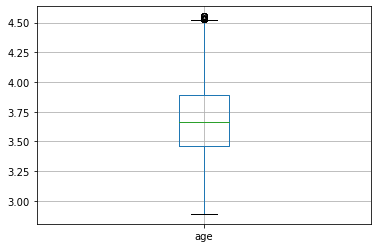

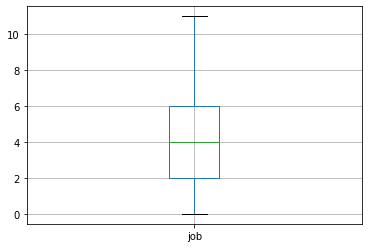

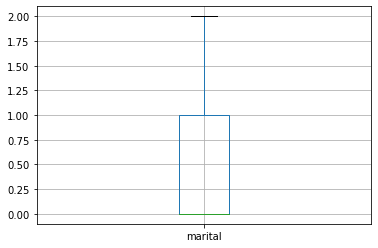

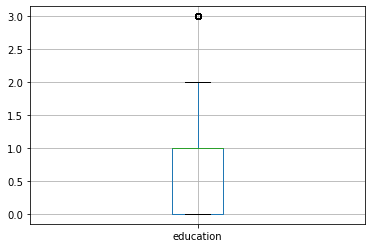

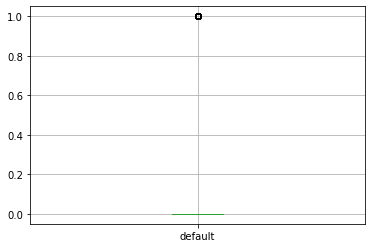

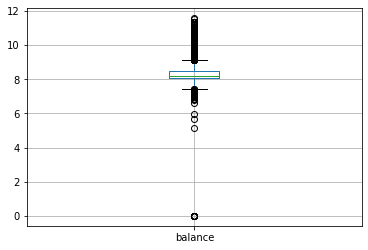

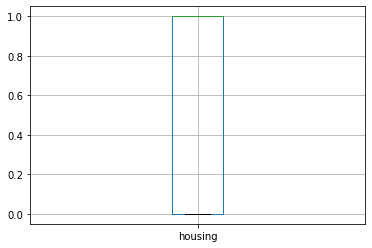

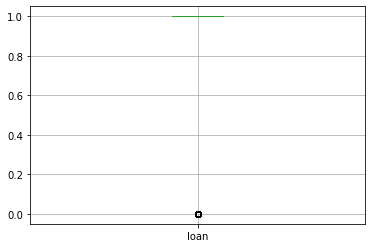

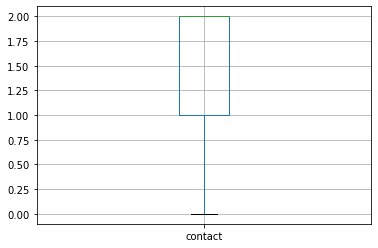

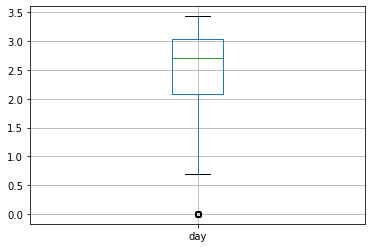

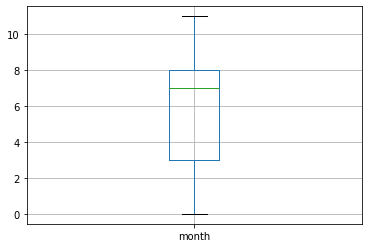

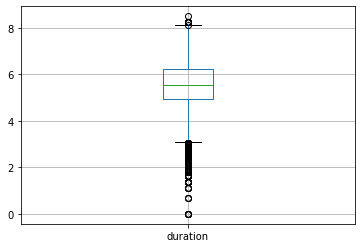

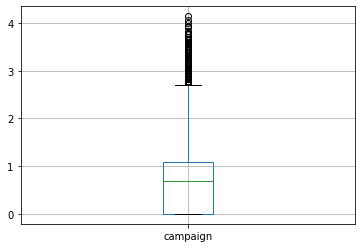

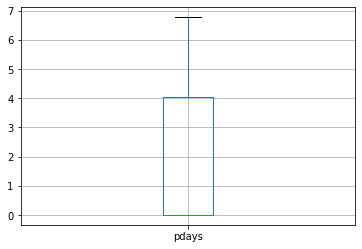

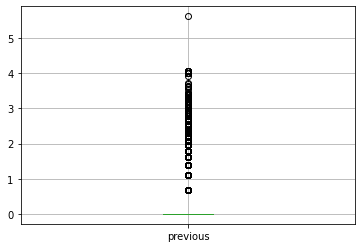

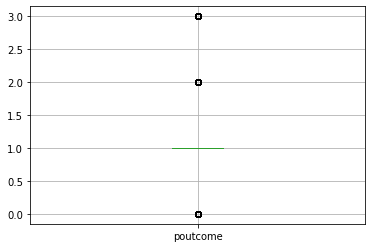

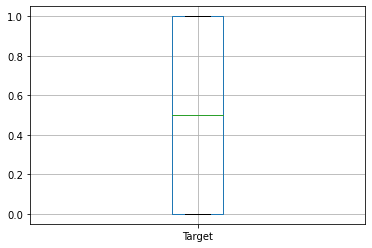

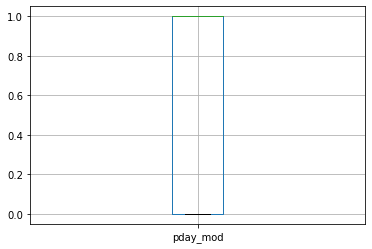

In [64]:
for column in df.columns:
    if column in cont_columns:      
        df[column] = df[column].map(lambda i: np.log(i) if i > 0 else 0)
    df.boxplot([column])
    plt.show()

## Corr plot of all features

In [65]:
df_2 = df.copy()

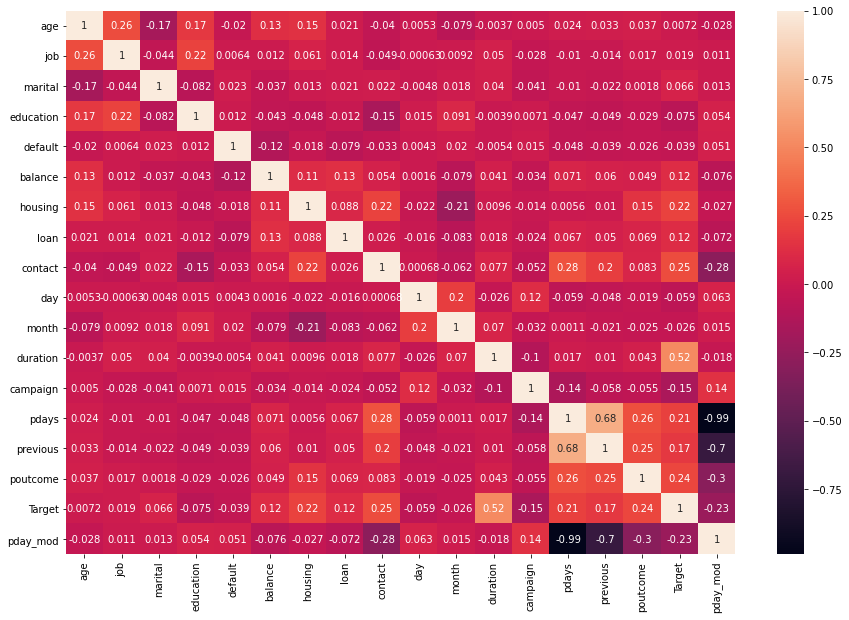

In [66]:
plt.figure(figsize=(15,10)) #for adjusting figuresize
sns.heatmap(df_2.corr(),annot=True) #for correlation plot

### Understanding from above corrp plot:

* 'pdays' and 'previous' are highly correlated

# Train Test Split (70:30)

In [67]:
X = df_2.drop('Target',axis=1) #independent dimensions  
y = df_2['Target'] #selecting target column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1) #train test split in 70:30 ratio

# Scaling of columns

In [68]:
scaler = StandardScaler() #using standard scaler method
X_train_scaled = scaler.fit_transform(X_train) #Scaling of Train dataset
X_test_scaled = scaler.fit_transform(X_test) #Scaling of Test dataset

# Models:
## Logistic Regression:

In [69]:
X1 = sm.add_constant(X)
Logistic = sm.Logit(df_2[["Target"]], X1)
result = Logistic.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.425733
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                79844
Model:                          Logit   Df Residuals:                    79826
Method:                           MLE   Df Model:                           17
Date:                Tue, 13 Oct 2020   Pseudo R-squ.:                  0.3858
Time:                        20:27:22   Log-Likelihood:                -33992.
converged:                       True   LL-Null:                       -55344.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.9215      0.300    -49.684      0.000     -15.510     -14.333
age           -0.1041      0.036     -2.873      0.004      -0.175      -0.033
job           -0.0054      0.004     -1.527      0.127      -0.012       0.002
marital        0.1721      0.014     12.217      0.000       0.145       0.200
education     -0.1318      0.013    -10.481      0.000      -0.156      -0.107
default       -0.2739      0.081     -3.377      0.001      -0.433      -0.115
balance        0.4373      0.025     17.589      0.000       0.389       0.486
housing        1.0119      0.021     48.397      0.000       0.971       1.053
loan           0.6494      0.030     22.001      0.000       0.592       0.707
contact        0.5574      0.013     42.005      0.000       0.531       0.583
day           -0.1096      0.013     -8.344      0.000      -0.135      -0.084
month         -0.0096      0.003     -2.901      0.004      -0.016      -0.003
duration       1.9113      0.015    126.620      0.000       1.882       1.941
campaign      -0.4207      0.015    -27.254      0.000      -0.451      -0.390
pdays         -0.1026      0.029     -3.505      0.000      -0.160      -0.045
previous       0.1729      0.027      6.355      0.000       0.120       0.226
poutcome       0.6258      0.016     40.169      0.000       0.595       0.656
pday_mod      -1.2846      0.158     -8.133      0.000      -1.594      -0.975
==============================================================================
"""

In [70]:
logic_r = LogisticRegression(solver='liblinear') #Instantiate the LogisticRegression object
logic_r.fit(X_train_scaled,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = logic_r.predict(X_test_scaled) #Predict  

In [71]:
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred)) #for confusion matrix
print('-'*40)
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[9551 2441]
 [2181 9781]]
----------------------------------------
Accuracy of Logistic Regression :0.81
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81     11992
           1       0.80      0.82      0.81     11962

    accuracy                           0.81     23954
   macro avg       0.81      0.81      0.81     23954
weighted avg       0.81      0.81      0.81     23954

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## Naive Bayes

In [72]:
NB = GaussianNB()   #Instantiate the Gaussian Naive bayes 
NB.fit(X_train_scaled,y_train) #Call the fit method of NB to train the model or to learn the parameters of model
y_predi = NB.predict(X_test_scaled) #Predict 

In [73]:
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) #for confusion matrix
print('-'*30)
NB_accuracy = accuracy_score(y_test,y_predi)
print('Accuracy of Naive Bayes :{:.2f}'.format(NB_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predi)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[9518 2474]
 [4341 7621]]
------------------------------
Accuracy of Naive Bayes :0.72
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.69      0.79      0.74     11992
           1       0.75      0.64      0.69     11962

    accuracy                           0.72     23954
   macro avg       0.72      0.72      0.71     23954
weighted avg       0.72      0.72      0.71     23954

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## K-Nearest Neighbor

In [74]:
# # k=3
# knn = KNeighborsClassifier(n_neighbors = 3)  #Instantiate KNN with k=3
# knn.fit(X_train_scaled,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
# y_predict = knn.predict(X_test_scaled) #Predict 

# print('\033[1m''->'*63)
# print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) #for confusion matrix
# print('-'*30)
# KNN_accuracy = accuracy_score(y_test,y_predict)
# print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy)) #for accuracy score
# print('-'*30)
# print('\n Classification Report\n',classification_report(y_test,y_predi)) #for classification report
# print('->'*63)

In [75]:
# oddList = list(np.arange(1,15)) #Range from 1 to 15
# neighbors = list(filter(lambda x: x % 2 != 0, oddList)) #Selecting only odd numbers from Range 1 to 24

# accuracy_list = [] #Empty list to store accuracy scores of KNN models based on various K values

# for i in neighbors:
#     knn = KNeighborsClassifier(n_neighbors = i) #Instantiate KNN with k=i
#     knn.fit(X_train_scaled,y_train)  #Call the fit method of KNN to train the model or to learn the parameters of model
#     y_pred = knn.predict(X_test_scaled) #Predict 
#     accuracy_s = accuracy_score(y_test,y_pred) #for accuracy score
#     accuracy_list.append(accuracy_s)  #for appedning accuracy score to accuracy score list
    
# MSE=[1 - j for j in accuracy_list] #calculation of Mean Squared Error

# optimal = neighbors[MSE.index(min(MSE))] #Optimal K value selected by minimum MSE
# print('optimal k is',optimal) #Print optimal K value selected by minimum MSE

# plt.plot(neighbors,MSE) #MSE plot 
# plt.xlabel('Number of Neighbors K') #XLabel
# plt.ylabel('Misclassification Error') #YLabel
# plt.show() #display plot

## SVC

In [76]:
# svc = SVC()  #Instantiate SVC
# svc.fit(X_train_scaled,y_train) #Call the fit method of SVC to train the model or to learn the parameters of model
# predicted_svc = svc.predict(X_test_scaled) #Predict 

# print('\033[1m''->'*63)
# print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_svc)) #for confusion matrix
# print('-'*30)
# SVC_accuracy = accuracy_score(y_test,predicted_svc) #for accuracy score
# print('Accuracy of SVC :',SVC_accuracy)
# print('-'*30)
# print('\n Classification Report\n',classification_report(y_test,predicted_svc)) #for classification report
# print('->'*63)

# Ensemble Models

## Decision Tree

In [77]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) #Instantiate Decision Tree
dTree.fit(X_train, y_train) #Call the fit method of DT to train the model or to learn the parameters of model
predicted_DT = dTree.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DT)) #for confusion matrix
print('-'*30)
DT_accuracy = accuracy_score(y_test,predicted_DT)
print('Accuracy of Decision Tree :{:.2f}'.format(DT_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DT)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11007   985]
 [   17 11945]]
------------------------------
Accuracy of Decision Tree :0.96
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     11992
           1       0.92      1.00      0.96     11962

    accuracy                           0.96     23954
   macro avg       0.96      0.96      0.96     23954
weighted avg       0.96      0.96      0.96     23954

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## Feature importance test for decision tree

In [78]:
xvar = df_2.drop('Target', axis=1) #variables in x
feature_cols = xvar.columns # columns in x
feat_importance = dTree.tree_.compute_feature_importances(normalize=False) #compute feature importance


feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_)) #dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order

,0
duration,0.343315
month,0.093948
balance,0.088140
poutcome,0.076291
age,0.075837
day,0.075404
contact,0.068984
housing,0.039236
job,0.029518
pdays,0.029443


In [79]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 28, random_state=1) #Instantiate Decision Tree with max_depth
dTreeR.fit(X_train, y_train) #Call the fit method of DT to train the model or to learn the parameters of model
predicted_DTR = dTreeR.predict(X_test) #Predict

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DTR)) #for confusion matrix
print('-'*30)
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
print('Accuracy of Decision Tree with Regularization:{:.2f}'.format(DTR_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DTR)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11003   989]
 [   27 11935]]
------------------------------
Accuracy of Decision Tree with Regularization:0.96
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     11992
           1       0.92      1.00      0.96     11962

    accuracy                           0.96     23954
   macro avg       0.96      0.96      0.96     23954
weighted avg       0.96      0.96      0.96     23954

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [80]:
# fig = plt.figure(figsize = (50, 25))
# _=tree.plot_tree(dTreeR, feature_names = X.columns, filled=True)

In [81]:
feat_importance = dTreeR.tree_.compute_feature_importances(normalize=False) #compute feature importance


feat_imp_dict = dict(zip(feature_cols, dTreeR.feature_importances_)) #dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order

,0
duration,0.342645
month,0.092567
balance,0.088277
poutcome,0.076831
age,0.076675
day,0.073178
contact,0.069770
housing,0.039479
pdays,0.031703
job,0.030546


## Bagging

In [82]:
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) #Instantiate Bagging Classifier
bagc = bagc.fit(X_train, y_train) #Call the fit method of Bagging classifier to train the model or to learn the parameters of model
predicted_BAG = bagc.predict(X_test) #Predict


print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_BAG)) #for confusion matrix
print('-'*30)
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
print('Accuracy of Decision Tree :{:.2f}'.format(BAG_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_BAG)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11121   871]
 [   14 11948]]
------------------------------
Accuracy of Decision Tree :0.96
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     11992
           1       0.93      1.00      0.96     11962

    accuracy                           0.96     23954
   macro avg       0.97      0.96      0.96     23954
weighted avg       0.97      0.96      0.96     23954

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## Adaptive Boosting

In [83]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(X_train, y_train) #Call the fit method of Adaptive boosting Classifier to train the model or to learn the parameters of model
predicted_ADA = adab.predict(X_test) #Predict



print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA)) #for confusion matrix
print('-'*30)
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
print('Accuracy of KNN :{:.2f}'.format(ADA_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_ADA)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[10134  1858]
 [ 2117  9845]]
------------------------------
Accuracy of KNN :0.83
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     11992
           1       0.84      0.82      0.83     11962

    accuracy                           0.83     23954
   macro avg       0.83      0.83      0.83     23954
weighted avg       0.83      0.83      0.83     23954

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## Gradient boosting

In [84]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) #Instantiate Gradient boosting Classifier
gradb = gradb.fit(X_train, y_train)#Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(X_test) #Predict


print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD)) #for confusion matrix
print('-'*30)
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('Accuracy of KNN :{:.2f}'.format(GRAD_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_GRAD)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[ 9997  1995]
 [ 1458 10504]]
------------------------------
Accuracy of KNN :0.86
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.87      0.83      0.85     11992
           1       0.84      0.88      0.86     11962

    accuracy                           0.86     23954
   macro avg       0.86      0.86      0.86     23954
weighted avg       0.86      0.86      0.86     23954

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## Random Forest

In [86]:
#n=100
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)#Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train) #Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RAN = randf.predict(X_test) #Predict

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RAN )) #for confusion matrix
print('-'*30)
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
print('Accuracy of Random Forest :{:.2f}'.format(RAN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_RAN )) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11271   721]
 [   11 11951]]
------------------------------
Accuracy of Random Forest :0.97
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     11992
           1       0.94      1.00      0.97     11962

    accuracy                           0.97     23954
   macro avg       0.97      0.97      0.97     23954
weighted avg       0.97      0.97      0.97     23954

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [92]:
#n=500
randf = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=10) #Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)  #Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RANN = randf.predict(X_test) #Predict

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RANN)) #for confusion matrix
print('-'*30)
RANN_accuracy = accuracy_score(y_test,predicted_RANN)
print('Accuracy of KNN :{:.2f}'.format(RANN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_RANN)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11185   807]
 [   13 11949]]
------------------------------
Accuracy of KNN :0.97
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     11992
           1       0.94      1.00      0.97     11962

    accuracy                           0.97     23954
   macro avg       0.97      0.97      0.97     23954
weighted avg       0.97      0.97      0.97     23954

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


# Models with accuracy scores

In [93]:
Scores = [
#       ('KNN', KNN_accuracy),
      ('Logistic Regression', LR_accuracy),
#       ('Naive bayes', NB_accuracy),
#       ('SVC', SVC_accuracy ),
      ('Decision Tree',DT_accuracy),
      ('Decision Tree with Regularization',DTR_accuracy),
      ('Bagging',BAG_accuracy),
      ('Adaptive Boosting',ADA_accuracy),
      ('Gradient Boosting',GRAD_accuracy),
      ('Random Forest N=100',RAN_accuracy),
      ('Random Forest N=500',RANN_accuracy)] #List of accuracy scores of all models

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score']) #Conversion of list to dataframe

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False) #Sort values in descending manner

Current Scores with Outliers replaced with mean:


,Model,Accuracy score
6,Random Forest N=100,0.969441
7,Random Forest N=500,0.965768
3,Bagging,0.963054
1,Decision Tree,0.958170
2,Decision Tree with Regularization,0.957585
5,Gradient Boosting,0.855849
4,Adaptive Boosting,0.834057
0,Logistic Regression,0.807047


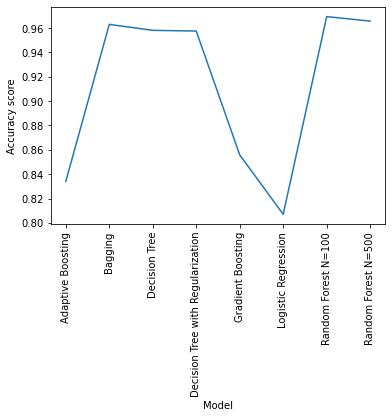

In [94]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show()

# Conclusion:
## Comments on dataset:
* The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion matrix of all models. 
* The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models. 
* Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge. Which is why we have upscaled the data but still that more data is needed.
* This situation could have been avoided if the datset was balanced. 
* Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome' columns.

## Comments on  Models:
* The best model was found to be Random Forest.
* SVC Perfomed better since it is a powerful ensembling technique.
* Using log on the data affected the accuracy scores of all models significantly as reduces right or left skewness of all continuous variables.
* In Decision Trees, Gradient boosting method always performed better for this dataset.
* While visualizing Decision Tree, The Pruned decision tree was easy to visualize as it had lesser leaf nodes than Tree which was not pruned.

## Miscellaneous Comments:
* After trying get_dummies the score did not show significant difference as well as I have skipped the get_dummies step because the dataset was creating more dimension, which was making the project more computationally intensive.
* If I had kept get_dummies step, then in production stage if the new dataset turned out to be huge in number of rows then this project would have taken a lot of time to execute.
* Outlier handeling did not make any significant difference in the accuracy scores of models.
* I have tried to keep minimum time complexity of this project.